# Visualising TS Data

In this notebook, we'll perform a visual analysis of a single stock. The matplotlib package is one of the most popular in Python for plotting. Let's first get our imports figured out first, since we have a good number of them now!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now we can load the dataset, from a file called `GME_WSB.csv`. This data covers a particularly exciting two-year period for GameStop, a chain of video game retail stores.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ImperialCollegeLondon/efds-ta-python/refs/heads/main/data/GME_WSB.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date").sort_index().drop_duplicates()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,1.0775,1.1250,1.0775,1.1100,1.1100,9214800
2020-07-02,1.1225,1.1275,1.0725,1.0725,1.0725,7550400
2020-07-06,1.0775,1.0850,1.0475,1.0600,1.0600,8563600
2020-07-07,1.0500,1.0625,1.0150,1.0225,1.0225,9826400
2020-07-08,1.0250,1.0725,1.0075,1.0650,1.0650,8211200


Let's create our first simple plot. We'll use the `plot()` function to do this.

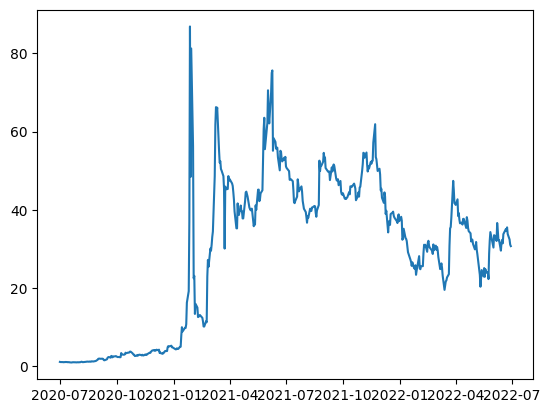

In [3]:
plt.plot(df['Close'])
plt.show()

That was easy, but its not very readable, or attractive. Let's try again.

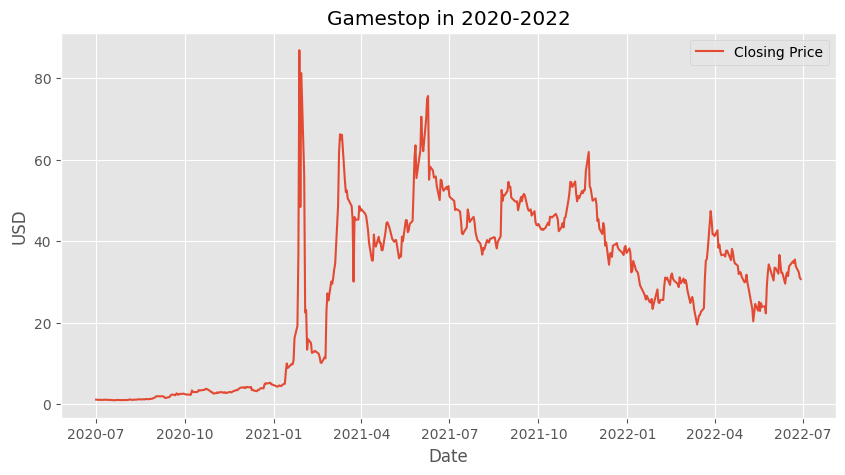

In [4]:
# Adjusting styles
plt.style.use("ggplot")

plt.figure(figsize=(10, 5))
plt.title('Gamestop in 2020-2022')
plt.ylabel("USD")
plt.xlabel("Date")
plt.plot(df["Close"], label="Closing Price")
plt.legend()

# Saving the figure - BEFORE we show it!
plt.savefig("GME_close.png")

plt.show()

One of the most commonly plotted technical indicators is Bollinger Bands. They consist of two lines:

- an upper band 2 standard deviations above the 20-day SMA
- a lower band 2 standard deviations below the 20-day SMA

When the bands are close, volatility is low. When they are far apart volatility is high. When the price is near the upper band the security may be overbought (ready for a decline), and when the price is near the lower band, the security may be oversold (ready for a jump).

In [5]:
# Adding these as features so the calculation of the Bollinger Bands is easier
df['20-day SMA'] = df['Adj Close'].rolling(window=20).mean()
df['Rolling Std'] = df['Adj Close'].rolling(window=20).std()

# Using the above features to calculate the bands
df['Bollinger High'] = df['20-day SMA'] + 2 * df['Rolling Std']
df['Bollinger Low'] = df['20-day SMA']  - 2 * df['Rolling Std']

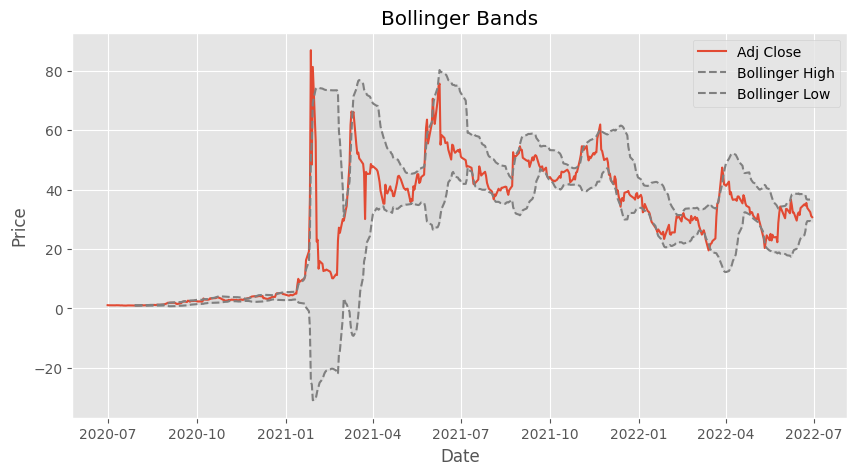

In [6]:
# Create the plot
plt.figure(figsize=(10,5))
plt.plot(df['Adj Close'], label='Adj Close')

# You may see the SMA line plotted too
#plt.plot(df["20-day SMA"], label="20-day SMA")

plt.plot(df['Bollinger High'], label='Bollinger High', linestyle='--', color='grey')
plt.plot(df['Bollinger Low'], label='Bollinger Low', linestyle='--', color='grey')

# You can shade the area between the upper and lower bands for emphasis
plt.fill_between(df.index, df['Bollinger High'], df['Bollinger Low'], color='grey', alpha=0.1)

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Exercise: High Highs

Earlier we looked at price surges (looking specifically for large *increases* in price). Alternatively, we may simply be interested in the highest prices reached during trading - irrespective of price the day before. Create a plot for `High` prices that helps visualise the highest `High` prices across the entire period.

- Define a price threshold as two standard deviations from the mean High for the period.
- Plot both the high price over the period as well as the price surge threshold line.
- Give the plot a fitting title, labels and a legend.

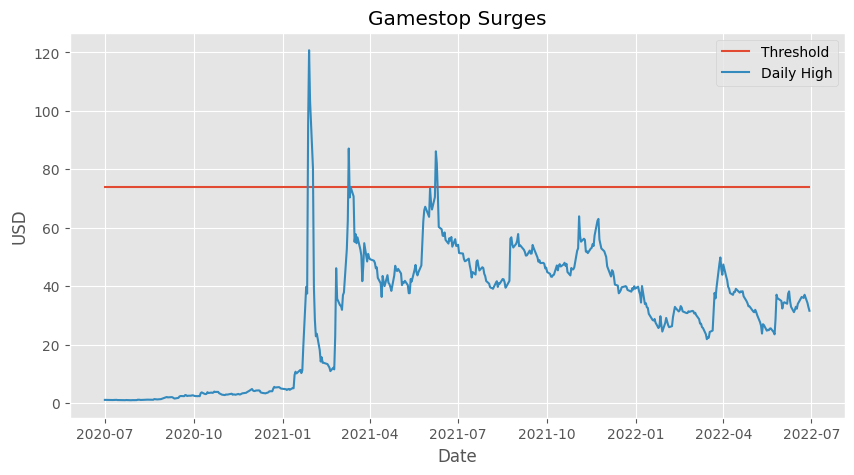

In [7]:
df["Surge"] = df["High"].mean() + (2 * df["High"].std())


plt.figure(figsize=(10, 5))
plt.title('Gamestop Surges')
plt.ylabel("USD")
plt.xlabel("Date")
plt.plot(df["Surge"], label="Threshold")
plt.plot(df["High"], label="Daily High")
plt.legend()

plt.show()

## Other common plots

Histograms show frequency distribution, or how often each value in the data occurs. They are a great way of visualising the distribution of returns in a financial data set. A histogram's tails (the sections that stretch away from the centre) offer one view of the risk of an asset. Heavy (tall) tails indicate extreme values, and long tails can indicate skew (positive skew when the tail is long to the right, and negative for long tails to the left).

For a histogram centered around zero, a negatively skewed distribution of returns can suggest that very large losses may occur. A positively skewed distribution implies the opposite - that gains can occasionally be very large. 

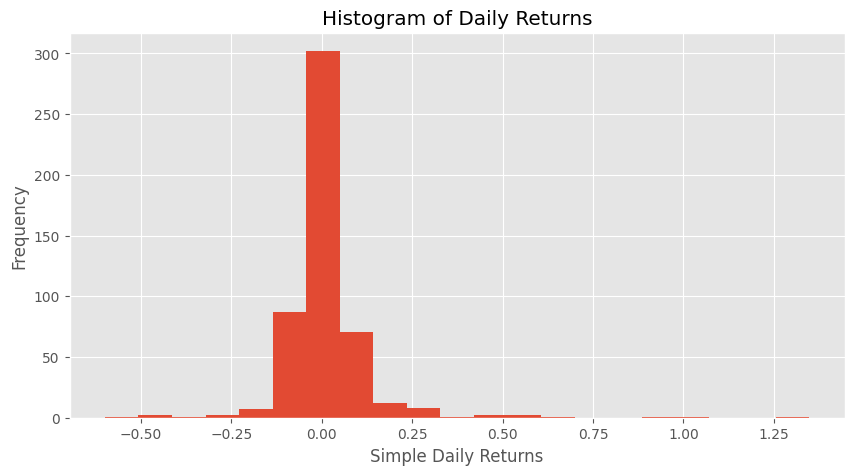

In [8]:
daily_returns = df["Adj Close"].pct_change().dropna()

# Square root choice - sqrt(number_of_samples)
recommended_bins = int(np.sqrt(len(daily_returns)))

plt.figure(figsize=(10, 5))
plt.hist(daily_returns, bins=21)
plt.title("Histogram of Daily Returns")
plt.ylabel("Frequency")
plt.xlabel("Simple Daily Returns")
plt.show()

Scatterplots can help us visualise the relationships between two variables. They are also excellent at visualising outliers.

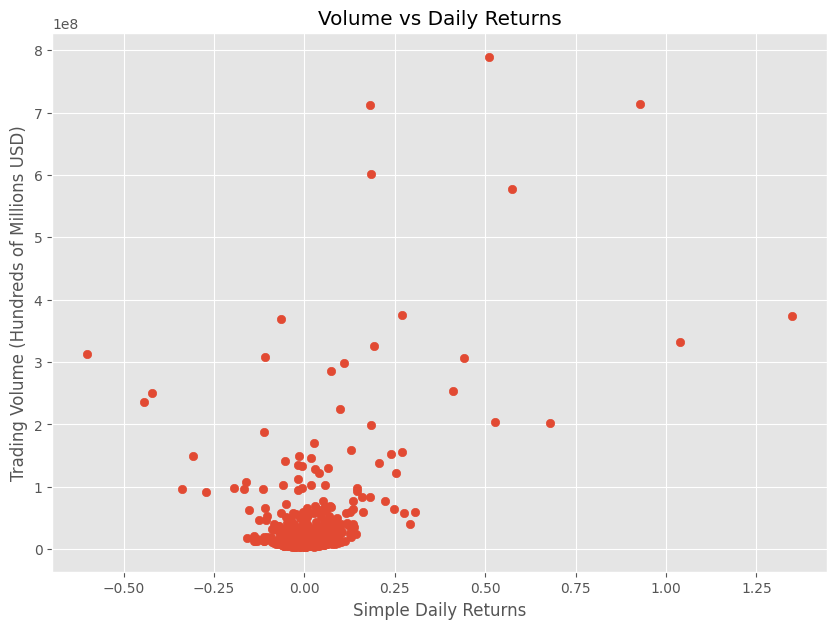

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(daily_returns, df["Volume"].iloc[1:])
plt.title("Volume vs Daily Returns")
plt.ylabel("Trading Volume (Hundreds of Millions USD)")
plt.xlabel("Simple Daily Returns")
plt.show()

## Subplots

There are times when one plot just isn't enough. In this case we can create a subplot, and then plot on its axes. This generally calls for a different approach to Matplotlib, so watch carefully!

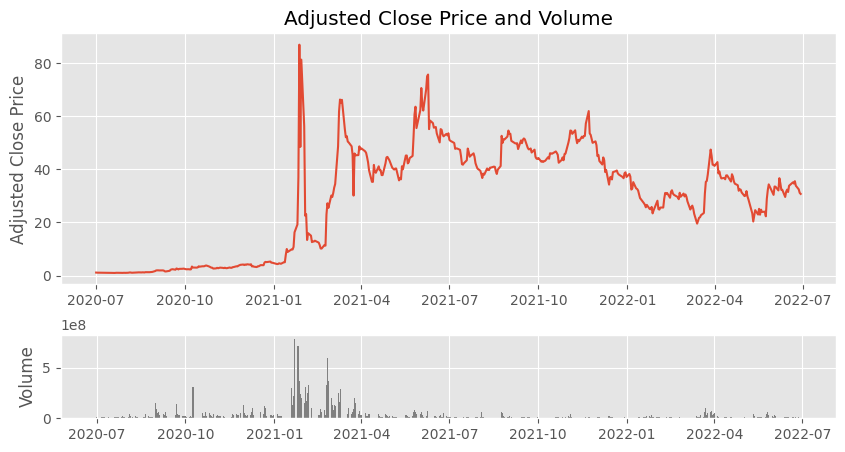

In [10]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,5), gridspec_kw={"height_ratios": [3, 1]})

# Adjust the space between the two plots
fig.subplots_adjust(hspace=0.3)

# Plot the adjusted close prices on the first (top) subplot
ax1.plot(df.index, df['Adj Close'], label='Adj Close')
ax1.set_title('Adjusted Close Price and Volume')
ax1.set_ylabel('Adjusted Close Price')

# # Plot the volume on the second (bottom) subplot
ax2.bar(df.index, df['Volume'], label='Volume', color='grey')
ax2.set_ylabel('Volume')

# Display the plot
plt.show()


### Matplotlib Interfaces

Prior to our subplots example, you'll notice we used `plt` to do every part of our plotting. Developers often refer to this as using the **Pyplot interface** to Matplotlib. Matplotlib also exposes a so-called **object-oriented interface**, which can be seen in the subplots example above. Using this interface involves creating the figure and axes, and then using those objects to build our plot(s).

Best practice suggests that developers should always use the object-oriented Matplotlib, even for the most basic plots.

### Advanced: Candlestick Plots

If you have OHLC data, you can use `mplfinance`. It offers yet another interface to Matplotlib (in fact, it was once part of the Matplotlib package).

In [11]:
import mplfinance as mpf

subset = df.loc["2021-01":"2021-02"]
mpf.plot(subset, type='candle')

ModuleNotFoundError: No module named 'mplfinance'